In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly import graph_objects as go
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt

In [26]:

df = pd.read_excel('Datasets/Bangla_ABSA_Datasets-master/Cricket.xlsx')   


In [27]:
df.head(5)

,Source,Date,text,Category,Tag
0,BBC Bangla,2018-06-03 00:00:00,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,other,positive
1,BBC Bangla,2018-06-04 00:00:00,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,team,positive
2,BBC Bangla,15/6/2017,বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?,team,positive
3,BBC Bangla,15/6/2020,সৌম্যকে বাদ দেওয়া হোক,batting,negative
4,BBC Bangla,27/1/2018,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",team,positive


In [28]:
df.drop(columns=['Source', 'Date', 'Category'], inplace=True)

In [29]:
# Define the mapping
tag_mapping = {
    "negative": 0,
    "positive": 1,
    "neutral": 2
}

# Create a new column with the mapped values
df['sentiment'] = df['Tag'].map(tag_mapping)
df.head(5)

,text,Tag,sentiment
0,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,positive,1
1,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,positive,1
2,বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?,positive,1
3,সৌম্যকে বাদ দেওয়া হোক,negative,0
4,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",positive,1


In [30]:
#check null values
df.isnull().sum()

text         0
Tag          0
sentiment    0
dtype: int64

### EDA

In [32]:
# Convert sentiment to a categorical type temporarily
df['sentiment'] = df['sentiment'].astype('category')

# Call describe again
df.describe(include='all')

,text,Tag,sentiment
count,2979,2979,2979
unique,2720,3,3
top,"এই পিচে বাংলাদেশকে ৪র্থ ইনিংসে ব্যাট করতে হবে,...",negative,0
freq,4,2152,2152


In [33]:

temp = df.groupby('sentiment').count()['text'].reset_index()


sentiment_mapping = {0: 'negative', 1: 'positive', 2: 'neutral'}
temp['sentiment'] = temp['sentiment'].map(sentiment_mapping)


temp = temp.sort_values(by='sentiment')

temp.style.background_gradient(cmap='Purples')

,sentiment,text
0,negative,2152
1,positive,566
2,neutral,261


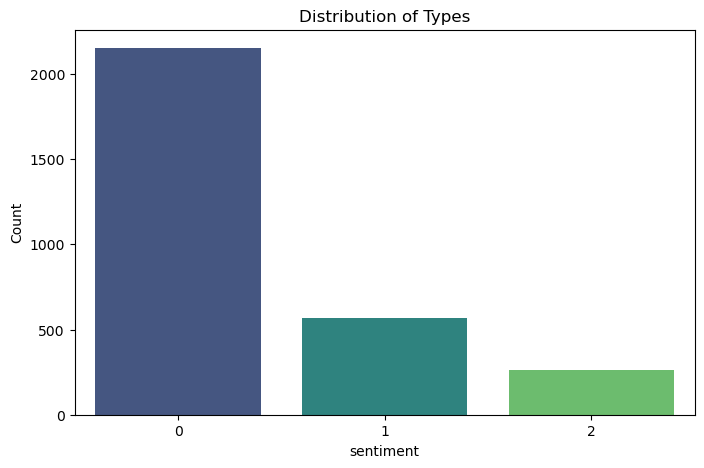

In [34]:

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Types')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

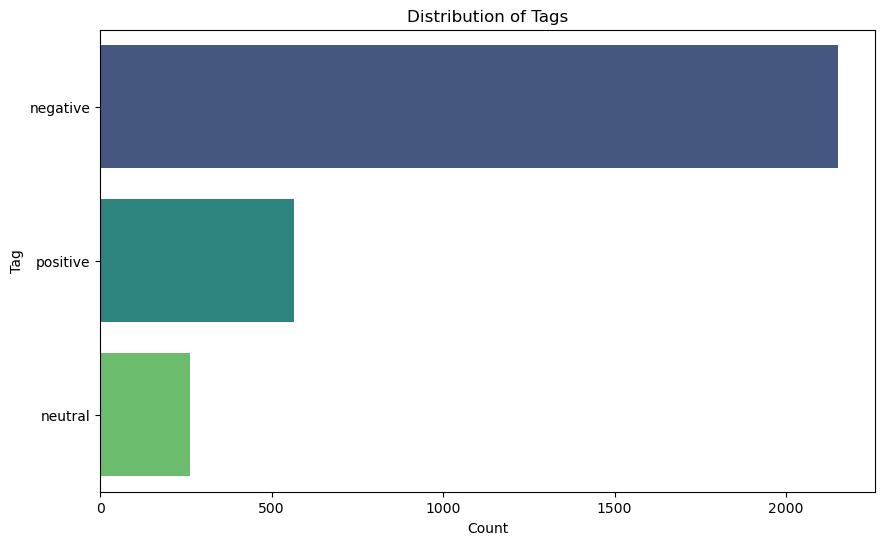

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Tag', data=df, palette='viridis', order=df['Tag'].value_counts().index)
plt.title('Distribution of Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

In [36]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text=temp.sentiment,
    values=temp.text,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))
fig.show()

#### Most common WOrds

In [37]:
from collections import Counter

df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,না,335
1,আর,249
2,বাংলাদেশ,233
3,এই,227
4,কি,223
5,করে,214
6,কে,191
7,জন্য,160
8,বাংলাদেশের,142
9,ও,141


In [38]:
df['temp_list'] = df['text'].apply(lambda x: str(x).split())
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('bengali')]
df['temp_list'] = df['temp_list'].apply(remove_stopword)

In [39]:
# Remove punctuation
def remove_punctuation(temp_list):
    return [re.sub(r'[“”"\'।।.,!?()\[\]{}<>;:।‘’–—…]', '', word) for word in temp_list]

df['temp_list'] = df['temp_list'].apply(remove_punctuation)

#### Most common words after removing stopwords

In [40]:
def remove_space(x):
    return [y for y in x if y != '']
df['temp_list'] = df['temp_list'].apply(remove_space)

In [41]:
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,বাংলাদেশ,251
1,না,151
2,বাংলাদেশের,144
3,ভালো,141
4,ক্রিকেট,140
5,রাজ্জাক,132
6,দলে,123
7,খেলা,123
8,ভাল,119
9,দিয়ে,110


#### Most common words Sentiments Wise

In [42]:
df.head(5)

,text,Tag,sentiment,temp_list
0,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,positive,1,"[জয়, বাংলা, কাপ, স্বাধীনতার, মাস, মার্চে, মাথা..."
1,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,positive,1,"[জয়, বাংলা, কাপ, স্বাধীনতার, মাস, মার্চে, মাথা..."
2,বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?,positive,1,"[বাংলাদেশের, ভারতের, সাপর্ট]"
3,সৌম্যকে বাদ দেওয়া হোক,negative,0,"[সৌম্যকে, বাদ]"
4,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",positive,1,"[প্রথমটি, হচ্ছে, কোচ, অতপর, সাকিবসাকিব, সাকিবর..."


In [45]:
Positive_sent = df[df['Tag']=='positive']
Negative_sent = df[df['Tag']=='negative']
Neutral_sent = df[df['Tag']=='neutral']

In [53]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Purples')

,Common_words,count
0,রাজ্জাক,74
1,বাংলাদেশ,51
2,ভালো,42
3,দলে,34
4,ভাল,34
5,বাংলাদেশের,32
6,চাই,23
7,লিটন,23
8,সুযোগ,20
9,ম্যাচ,20


In [55]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Greens')

,Common_words,count
0,বাংলাদেশ,183
1,না,126
2,ক্রিকেট,110
3,বাংলাদেশের,103
4,খেলা,97
5,দিয়ে,96
6,ভালো,85
7,দলে,82
8,একটা,81
9,ম্যাচ,80


In [56]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,বাংলাদেশ,17
2,খেলা,17
3,না,16
4,ভালো,14
5,ভাল,13
6,পিচ,12
7,হবে,11
8,ক্রিকেট,11
9,ব্যাটিং,11
10,ভাই,9


### Look at Unique Words in each Segment

In [57]:
raw_text = [word for word_list in df['temp_list'] for word in word_list]

In [58]:
def words_unique(Tag, numwords, raw_words):
    allother = []
    for item in df[df.Tag != Tag]['temp_list']:
        for word in item:
            allother.append(word)
    allother = list(set(allother))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in df[df.Tag == Tag]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns=['words', 'count'])
    
    return Unique_words

#### Positive

In [61]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,পর,5
1,সামনের,5
2,জিদবে,4
3,ইনশা,4
4,টানা,4
5,জিতবো,4
6,চাইতেও,4
7,শুরুতেই,4
8,উপকৃত,4
9,SL,4


#### Negative unique

In [67]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,নান্নু,37
1,আবাল,36
2,বাল,29
3,পাপন,27
4,বিসিবির,22
5,প্রধান,20
6,করে,19
7,দোষ,19
8,যুক্তি,18
9,কেন,17


#### Neutral Unique

In [66]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Purples')

The top 10 unique words in Neutral Tweets are:


,words,count
0,কেসবাই,2
1,দিলেন,2
2,খেলাইতামিমমমিনুলকায়েছমুসিকুর,2
3,তারের,2
4,উচিতবলেন,2
5,মুছন,2
6,রেকড,2
7,ধারে,2
8,ভদ্রলোকের,2
9,খেলাই,2
